In [100]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23', 0.0)


In [13]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [315]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).all()
prcp = {date: prcp for date, prcp in results}
prcp


{'2017-08-23': 0.0,
 '2017-08-22': 0.0,
 '2017-08-21': 0.0,
 '2017-08-20': 0.0,
 '2017-08-19': 0.0,
 '2017-08-18': 0.0,
 '2017-08-17': 0.0,
 '2017-08-16': 0.0,
 '2017-08-15': 0.02,
 '2017-08-14': 0.0,
 '2017-08-13': 0.0,
 '2017-08-12': 0.0,
 '2017-08-11': 0.0,
 '2017-08-10': 0.0,
 '2017-08-09': 0.0,
 '2017-08-08': 0.0,
 '2017-08-07': 0.0,
 '2017-08-06': 0.0,
 '2017-08-05': 0.0,
 '2017-08-04': 0.02,
 '2017-08-03': 0.0,
 '2017-08-02': 0.0,
 '2017-08-01': 0.02,
 '2017-07-31': 0.0,
 '2017-07-30': 0.0,
 '2017-07-29': 0.0,
 '2017-07-28': 0.0,
 '2017-07-27': 0.0,
 '2017-07-26': 0.0,
 '2017-07-25': 0.0,
 '2017-07-24': 0.05,
 '2017-07-23': 0.0,
 '2017-07-22': 0.03,
 '2017-07-21': 0.0,
 '2017-07-20': 0.03,
 '2017-07-19': 0.0,
 '2017-07-18': 0.05,
 '2017-07-17': 0.03,
 '2017-07-16': 0.02,
 '2017-07-15': 0.0,
 '2017-07-14': 0.02,
 '2017-07-13': 0.07,
 '2017-07-12': 0.0,
 '2017-07-11': 0.0,
 '2017-07-10': 0.0,
 '2017-07-09': 0.0,
 '2017-07-08': 0.0,
 '2017-07-07': 0.0,
 '2017-07-06': 0.0,
 '2017-07

In [178]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.head(10)

,date,precipitation
0,2017-08-23,0.00
1,2017-08-22,0.00
2,2017-08-21,0.00
3,2017-08-20,0.00
4,2017-08-19,0.00
5,2017-08-18,0.00
6,2017-08-17,0.00
7,2017-08-16,0.00
8,2017-08-15,0.02
9,2017-08-14,0.00


In [48]:
# Sort the dataframe by date
df = df.sort_values(by='date')
df = df.dropna(how="any")
df.head(10)

,date,precipitation
2229,2016-08-23,0.70
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2228,2016-08-23,1.79
2227,2016-08-23,0.02
2225,2016-08-23,0.05
2222,2016-08-24,1.45
2221,2016-08-24,2.15
2220,2016-08-24,1.22
2218,2016-08-24,2.28


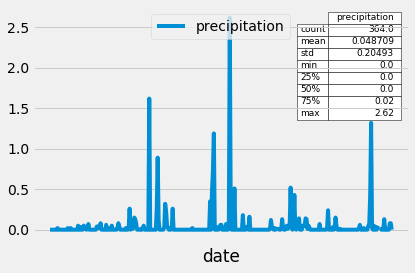

<Figure size 432x288 with 0 Axes>

In [184]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(1, 1)

table(ax, np.round(df.describe(), 6), loc='upper right', colWidths=[0.195]) 

df.plot(ax=ax, x='date',y='precipitation', legend=False)

ax.xaxis.grid(False)

plt.legend(loc="upper center")

plt.show()

#save the plot as a png file
plt.savefig('Images/summary-precipitation-year-ago.png')

![precipitation](Images/precipitation.png)

In [74]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [152]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Measurement.station).distinct().count()
print(results)

9


In [185]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [175]:
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()[0]

most_active


'USC00519281'

In [176]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == most_active).all()


[(54.0, 85.0, 71.66378066378067)]

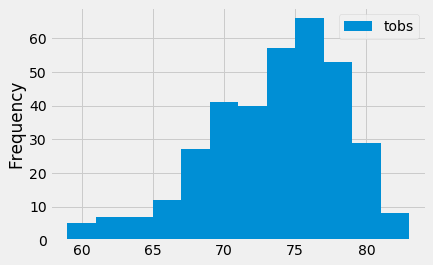

<Figure size 432x288 with 0 Axes>

In [284]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= year_ago).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).all()

df2 = pd.DataFrame(results, columns=["date","tobs"])

df2.plot.hist(alpha=1, bins=12)
plt.show()
plt.savefig('Images/summary-highest-temp-most-active-station.png')

In [183]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
    print(calc_temps('2012-08-09', '2012-08-23'))

[(65.0, 74.77319587628865, 82.0)]


In [227]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temp = calc_temps('2017-08-09', '2017-08-23')
print(calc_temps('2017-08-09', '2017-08-23'))

[(70.0, 78.64406779661017, 85.0)]


In [ ]:
tf = pd.Dataframe({
    
})

C:\Users\victo\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


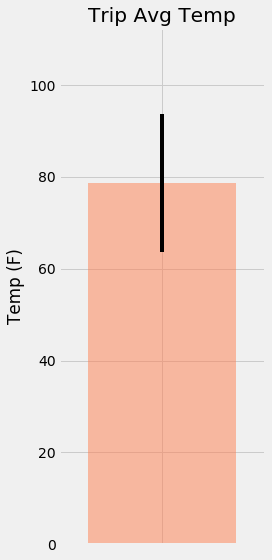

In [311]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))

tmin = trip_temp[0][0]
tmax = trip_temp[0][2]
xpos = 1

ax.set(xticks=range(xpos), xticklabels="", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)

bar = ax.bar(x_axis, trip_temp[0][1], alpha = 0.5, color ="coral", yerr=tmax-tmin)

fig.tight_layout()
fig.show()
fig.savefig("Images/trip-avg-temp.png")

In [299]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def stations_prcp(start_date, end_date):
    """Total amount of rainfull per weather station for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        Precipitation amount for each weather station during the time period"""

    return session.query(Station.station, Station.name, Station.latitude, Station.longitude,\
        Station.elevation, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        filter(Station.station == Measurement.station).\
                         group_by(Station.station).\
                         order_by(func.sum(Measurement.prcp).desc()).all()


# function usage example
results = stations_prcp('2017-08-09', '2017-08-23')

df_prcp = pd.DataFrame(results, columns=['station', 'name', 'latitude', 'longitude', 'elevation', 'total precipitation'])
df_prcp

,station,name,latitude,longitude,elevation,total precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,3.15
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.51
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.34
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.04
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02


## Optional Challenge Assignment

In [197]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip


# Use the start and end date to create a range of dates


# Stip off the year and save a list of %m-%d strings


# Loop through the list of %m-%d strings and calculate the normals for each date



In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index



In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

